In [1]:
from glob import glob
import baltic as bt
from matplotlib import pyplot as plt
%matplotlib inline
import random
import pickle

In [2]:
def is_monophyletic(node, traitname):
    n_states = len(set([l.traits[traitname] for l in tree.traverse_tree(node, include_all=True) if l.branchType == 'leaf']))
    return True if n_states == 1 else False

def desaturate(color, s): # Adjust (R,G,B,A) tuple by saturation proportion s
    if s > 0.85:
        return color
    else:
        s = s/2.0
        i = [ float(c)*(float(s)) for c in color[:3]]
        i.append(s)
    return tuple(i)

def get_label(leaf):
    name = leaf.name
    if len(name.split('|')) > 3:
        host = name.split('|')[2]
        strain = name.split('|')[4]
    else:
        host = name.split('|')[0]
        strain = name.split('|')[1]
    if host not in ['Cercopithecus_cephus', 'Mandrillus_sphinx', 'Homo_sapiens']:
        return strain_names[host]
    elif host == 'Homo_sapiens':
        if leaf.parent.traits['host'] == 'Cercocebus_atys':
            label = 'HIV-2'
        else:
            label = 'HIV-1'
    elif host == 'Mandrillus_sphinx':
        if 'MND-1' in strain:
            label = 'SIVmnd-1'
        elif 'MND-2' in strain:
            label = 'SIVmnd-2'
        else:
            label = 'SIVmnd'
    else:
        if 'MUS-1' in strain:
            label = 'SIVmus-1'
        elif 'MUS-2' in strain:
            label = 'SIVmus-2'
        elif 'MUS-3' in strain:
            label = 'SIVmus-3'
        else:
            label = 'SIVmus'
    return label

def plot_tree(cur_tree, ax, segmentlabel, xlim):
    branchWidth = 5
    max_cl_w = []
    maxX,maxY = 0.0, 0.0
    for t in trees:
        max_cl_w += [ k.width for k in t.Objects if isinstance(k,bt.clade) ]
    if max_cl_w != []:
        max_cl_w = float(max(max_cl_w))

    for k in cur_tree.Objects: ## iterate over branches
        x=k.height + (xlim-(1.0+cur_tree.treeHeight)) ## or use absolute time instead
        y=k.y*1.1 ## get y position from .drawTree that was run earlier, but could be anything else
        xp=k.parent.height+ (xlim-(1.0+cur_tree.treeHeight)) ## get x position of current object's parent
        if x==None: ## matplotlib won't plot Nones, like root
            x=0.0+ (xlim-(1.0+cur_tree.treeHeight))
        if xp==None:
            xp=x
        maxX = max(x, maxX)
        maxY = max(y, maxY)

        if k.traits.has_key('host') and k.traits.has_key('host.prob'):
            c_desat=desaturate(colors[k.traits['host']], k.traits['host.prob']) ## can be discrete too
            c = colors[k.traits['host']]
        else:
            c, c_desat='k', 'k'
        if k.branchType=='leaf': ## if leaf...
            label = get_label(k)
            s=80 ## tip size can be fixed
            ax.text(cur_tree.treeHeight+0.05+ (xlim-(1.0+cur_tree.treeHeight)),y,label, size=24)
            if isinstance(k, bt.clade):
                left, right = x, cur_tree.treeHeight+ (xlim-(1.0+cur_tree.treeHeight))
                width = max(k.width / max_cl_w, 0.06)

                points = [[left, y], [right,y+0.5*width], [right,y-0.5*width]]
                ax.add_patch(plt.Polygon(points, facecolor=c, zorder=8, edgecolor=None) )

            else:
                ax.scatter(x,y,s=s,facecolor=c,edgecolor='none',zorder=11) ## plot circle for every tip
                ax.scatter(x,y,s=s+0.7*s,facecolor='k',edgecolor='none',zorder=10) ## plot black circle underneath

        elif isinstance(k,bt.node): ## if node...
            ax.plot([x,x],[k.children[-1].y*1.1,k.children[0].y*1.1],lw=branchWidth,color=c_desat,ls='-',zorder=9) ## plot vertical bar

        ax.plot([xp,x],[y,y],lw=branchWidth,color=c_desat,ls='-',zorder=9) ## always plot branch
    
    ax.text(0.0, maxY+1.2, '%s'%segmentlabel, fontsize=48, fontweight='bold')
    if '(9)' in segmentlabel:
        ax.plot([0.0,0.5],[-0.8,-0.8], lw=branchWidth, color='gray', ls='-')
        ax.text(0.25, 0.0, '0.5 subs/site', fontsize=44, ha='center')
    
    ax.set_ylim(-2.5,maxY+2.5) ## set y limits
    ax.set_xlim(-1.1, xlim)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    ax.tick_params(axis='x',labelsize=0,size=0)
    ax.tick_params(axis='y',labelsize=0,size=0)

In [3]:
treefiles = glob('/Users/Sidney/Dropbox/siv-manuscript/beast/supplement/discreteTraits/trees/*.mcc')
treefiles.sort(key=lambda x: int(x.split('/')[-1].split('.')[0].split('_')[1]))
trees = [bt.loadNexus(treefile, absoluteTime=False) for treefile in treefiles]

max_tree_height = max(t.treeHeight for t in trees)
print 'order'
print treefiles


Tree height: 2.566253
Tree length: 27.918122

Tree is strictly bifurcating = True

Tree is multitype = False

Tree has annotations = True

Numbers of objects in tree: 309 (154 nodes and 155 leaves)


Tree height: 1.294332
Tree length: 23.028062

Tree is strictly bifurcating = True

Tree is multitype = False

Tree has annotations = True

Numbers of objects in tree: 299 (149 nodes and 150 leaves)


Tree height: 1.519086
Tree length: 25.962392

Tree is strictly bifurcating = True

Tree is multitype = False

Tree has annotations = True

Numbers of objects in tree: 211 (105 nodes and 106 leaves)


Tree height: 0.847433
Tree length: 18.441045

Tree is strictly bifurcating = True

Tree is multitype = False

Tree has annotations = True

Numbers of objects in tree: 203 (101 nodes and 102 leaves)


Tree height: 1.432793
Tree length: 36.766395

Tree is strictly bifurcating = True

Tree is multitype = False

Tree has annotations = True

Numbers of objects in tree: 475 (237 nodes and 238 leaves)



In [4]:
common_names = pickle.load(open('../../data/hosts/common_names.p', 'rb'))
colors = pickle.load(open('../colors.p', 'rb'))
strain_names = pickle.load(open('../strain_names.p', 'rb'))

genes = {1: "(1) - 3' LTR, gag", 2: "(2) - gag", 3: "(3) - gag, pol", 4: "(4) - pol", 
        5: "(5) - pol", 6: "(6) - pol, vif", 7: "(7) - vif, vpr, tat", 8: "(8) - tat, rev, vpu, env", 
        9: "(9) - env", 10: "(10) - env", 11: "(11) - env, tat, rev", 12: "(12) - env, rev, nef, 5' LTR"}


for tree in trees:
    for n in tree.nodes:
        if n.parent.index =='Root' or is_monophyletic(n.parent, 'host'):
            continue
        elif is_monophyletic(n, 'host'):
            try:
                strain = [i for i in n.children if i.branchType=='leaf'][0].name.split('|')[4]
            except:
                strain = ''
            host = n.traits['host']
            new_name = '%s|%s|%d'%(n.traits['host'], strain, random.randint(500,1000))
            tree.collapse(n, new_name)
    tree.drawTree()

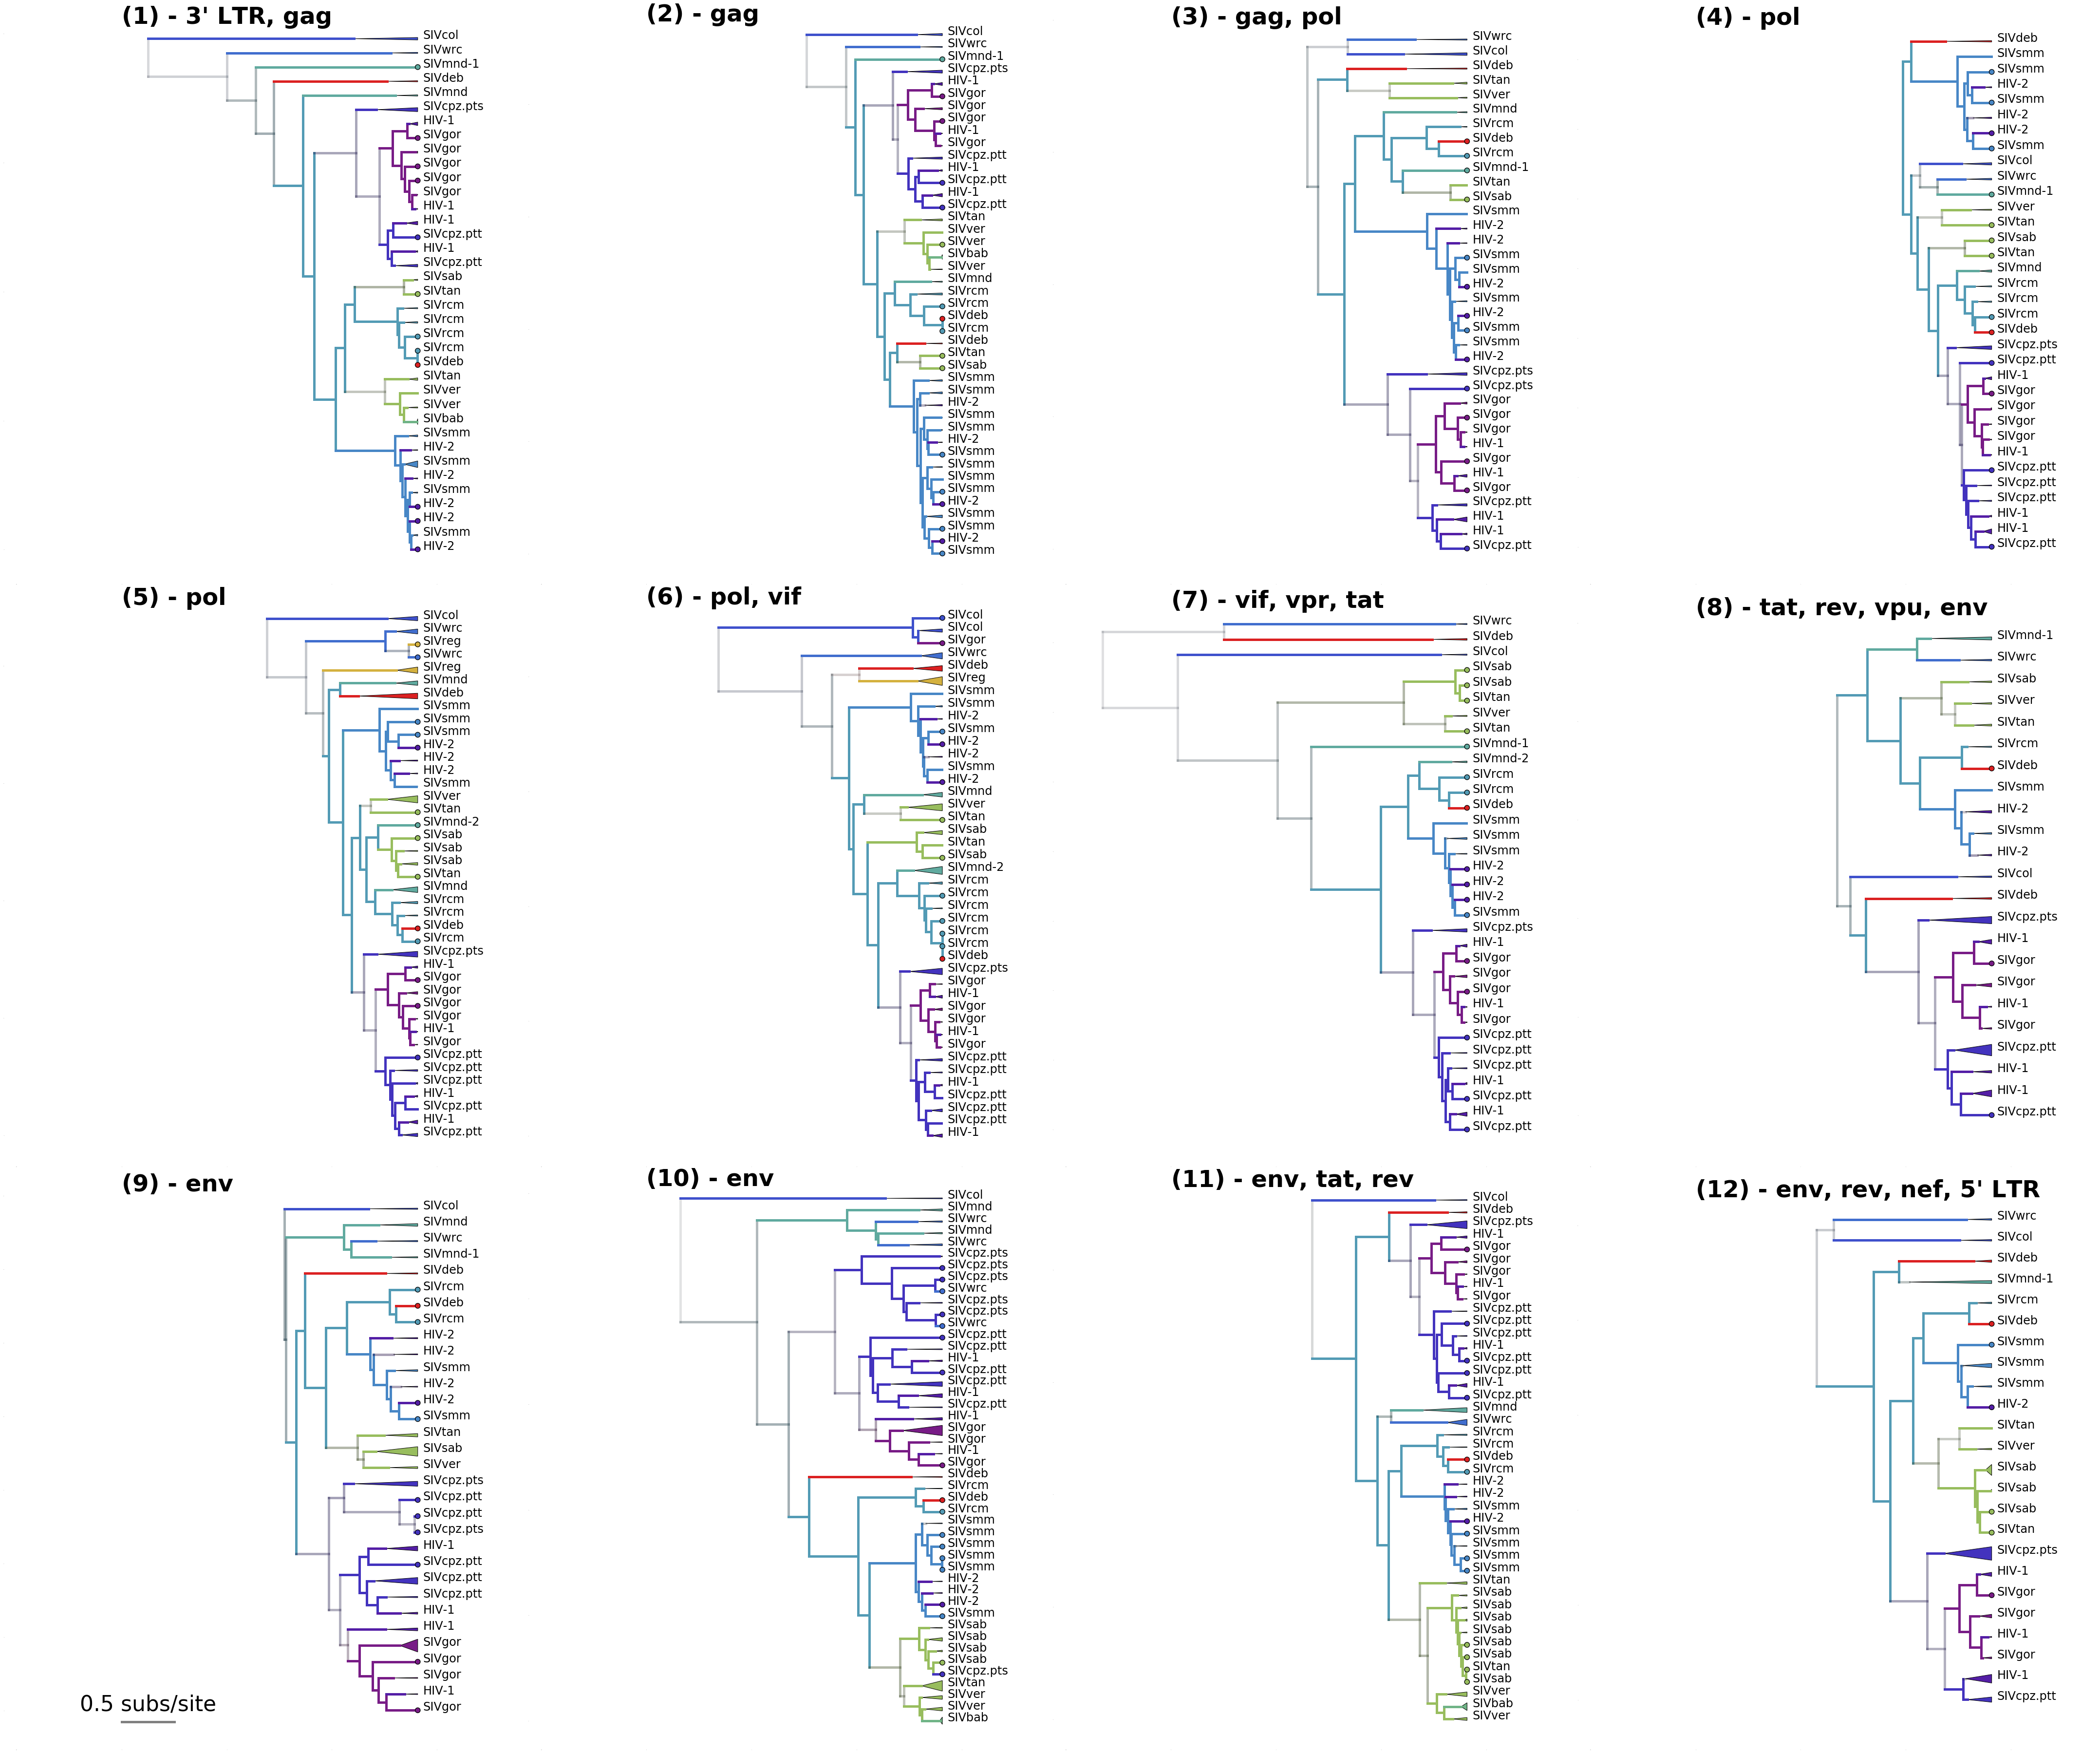

In [5]:
ncols = 4
ntrees = len(trees)
nrows = len(trees) / ncols
fig, axes = plt.subplots(nrows, ncols, figsize=(60,50))

segmentNumber = 1

for i, row in enumerate(axes):
    for treeObject, axis in zip(trees[i*ncols:i*ncols+ncols], row):
        axis=plot_tree(treeObject, axis, genes[segmentNumber], max_tree_height*1.1)
        segmentNumber += 1

plt.tight_layout()
plt.show()


### Figure S5: Maximum clade credibility trees for each of the 12 GARD-identified genomic segements of the lentiviral genome (supplemental dataset with 15 hosts). 
Tips are color coded by known host state; branches and internal nodes are color coded by inferred host state, with color saturation indicating the confidence of these assignments. Monophyletic clades of viruses from the same lineage are collapsed, with the triangle width proportional to the number of represented sequences.